# Ch7:  Iterative Techniques in Matrix Algebra

$$ \text{葛雨辰} \quad 201800150053
$$

## 1 Introduction

In Chapter 7, we apply interative methods for solving Linear Systems $\textbf{when the Linear Systems have a large scale.}$

Throughout the homework, in the algorithm we shall set $TOL=10^{-3}$ and the norm to be $l_{\infty}$.

## 2 Jacobi, Gauss-Seidel and SOR Method for 7.3/5e,6

We shall apply Jacobi Method, Gauss-Seidel Method and SOR Method for solving the linear equations below (7.3/5e) and compare the results.

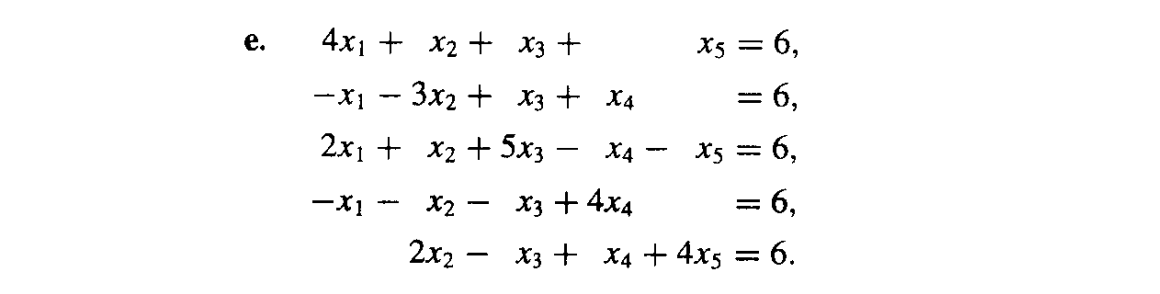

### 2.1 Jacobi Method

First we apply basic Jacobi Method which has the same decomposition of A as Gauss Seidel Method does. But the invertible matrix used in the method is totally different. Here follows the code.

In [123]:
import numpy as np
def JacobiMethod(A,b,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_inv = np.linalg.inv(D)
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        temp = X
        X =  np.dot(np.dot(D_inv,L+U),X) + np.dot(D_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([
    [4,1,1,0,1],
    [-1,-3,1,1,0],
    [2,1,5,-1,-1],
    [-1,-1,-1,4,0],
    [0,2,-1,1,4]
])
b = np.array([6,6,6,6,6])
N = 30
JacobiMethod(A,b,N)

The 0 th iteration： [0. 0. 0. 0. 0.]
The 1 th iteration: [ 1.5 -2.   1.2  1.5  1.5]
The 2 th iteration: [ 1.325 -1.6    1.6    1.675  2.425]
The 3 th iteration: [ 0.89375 -1.35     1.81     1.83125  2.28125]
The 4 th iteration: [ 0.8146875  -1.08416667  1.935       1.8384375   2.1696875 ]
The 5 th iteration: [ 0.74486979 -1.01375     1.89258333  1.91638021  2.06622396]
The 6 th iteration: [ 0.76373568 -0.97863542  1.90132292  1.90592578  2.00092578]
The 7 th iteration: [ 0.76909668 -0.98549566  1.87160313  1.92160579  1.98816699]
The 8 th iteration: [ 0.78143139 -0.99196259  1.87141502  1.91380104  1.98024716]
The 9 th iteration: [ 0.7850751  -0.99873844  1.8646296   1.91522095  1.98538479]
The 10 th iteration: [ 0.78718101 -1.00174151  1.8658388   1.91274157  1.98672138]
The 11 th iteration: [ 0.78729533 -1.00286688  1.86536849  1.91281957  1.98914507]
The 12 th iteration: [ 0.78708833 -1.00303576  1.86604817  1.91244923  1.98957067]
The procedure was successful.


### 2.2 Gauss--Seidel Method

It's clear that Gauss Seidel Method and Jacobi Method has the same decomposition of A. But the invertible matrix used in the method is totally different. Here follows the code. As we can see from the code,  Gauss--Seidel Method is a special case of SOR Method when $w = 1$.

In [124]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([
    [4,1,1,0,1],
    [-1,-3,1,1,0],
    [2,1,5,-1,-1],
    [-1,-1,-1,4,0],
    [0,2,-1,1,4]
])
b = np.array([6,6,6,6,6])
w = 1
N = 30
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0.]
The 1 th iteration: [ 1.5     -2.5      1.1      1.525    2.64375]
The 2 th iteration: [ 1.1890625  -1.52135417  1.86239583  1.88252604  2.25564453]
The 3 th iteration: [ 0.85082845 -1.03530219  1.89436317  1.92747236  2.0093738 ]
The 4 th iteration: [ 0.7828913  -0.98701859  1.87161643  1.91687229  1.98219533]
The 5 th iteration: [ 0.78330171 -0.998271    1.86614704  1.91279444  1.98747365]
The 6 th iteration: [ 0.78616258 -1.00240703  1.86606999  1.91245638  1.98960692]
The 7 th iteration: [ 0.78668253 -1.00271872  1.86628339  1.9125618   1.98978976]
The procedure was successful.


### 2.3 SOR Method

As we can see, $\textbf{SOR Method is based on Guass­Seidel method by analyzing the error term}$. When $ 0 < ω < 1 $，the procedures are called under-relaxation methods and can be used to otain convergence of some systems that are originally not convergent. When $ 1 < ω $，the procedures are called over-relaxation methods and can be used to solve particular partial differential equations.

In [125]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([
    [4,1,1,0,1],
    [-1,-3,1,1,0],
    [2,1,5,-1,-1],
    [-1,-1,-1,4,0],
    [0,2,-1,1,4]
])
b = np.array([6,6,6,6,6])
w = 1.1
N = 30
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0.]
The 1 th iteration: [ 1.65       -2.805       1.2111      1.6654275   3.06780994]
The 2 th iteration: [ 1.07967477 -1.260654    2.04248922  1.9953725   2.0495358 ]
The 3 th iteration: [ 0.76340549 -0.87330065  1.86185863  1.9322527   1.90600341]
The 4 th iteration: [ 0.77765507 -1.00663597  1.85752216  1.90462358  2.00009655]
The 5 th iteration: [ 0.78821424 -1.00889485  1.86842882  1.9126684   1.99271663]
The 6 th iteration: [ 0.78680966 -1.00120508  1.86641069  1.91303736  1.9885688 ]
The 7 th iteration: [ 0.78653107 -1.0024766   1.86618347  1.9125117   1.98976499]
The 8 th iteration: [ 0.78664213 -1.00266623  1.86634656  1.91258751  1.98977367]
The procedure was successful.


Moreover we change the parameter to $w = 1.3$ to see what happens.

In [126]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([
    [4,1,1,0,1],
    [-1,-3,1,1,0],
    [2,1,5,-1,-1],
    [-1,-1,-1,4,0],
    [0,2,-1,1,4]
])
b = np.array([6,6,6,6,6])
w = 1.3
N = 30
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0.]
The 1 th iteration: [ 1.95       -3.445       1.4417      1.9326775   4.02968231]
The 2 th iteration: [ 0.70642575 -0.41038757  2.41706293  2.25195461  1.06150743]
The 3 th iteration: [ 0.74091287 -0.77470504  1.51252987  1.75500337  2.05630216]
The 4 th iteration: [ 0.81963487 -1.30683253  2.0107468   1.91865246  2.21248116]
The 5 th iteration: [ 0.75628102 -0.83293234  1.85416698  1.95209685  1.79583446]
The 6 th iteration: [ 0.80756824 -1.05068554  1.83145481  1.88058063  2.07822937]
The 7 th iteration: [ 0.77855497 -1.01361947  1.89854663  1.92645751  1.97631281]
The 8 th iteration: [ 0.78653052 -0.97924226  1.85076341  1.91092954  1.97405963]
The 9 th iteration: [ 0.78922709 -1.01815878  1.86919136  1.90980553  2.00638571]
The 10 th iteration: [ 0.78457093 -0.99696778  1.86868706  1.91535266  1.98094702]
The 11 th iteration: [ 0.78751217 -1.0024144   1.86355321  1.91120577  1.99179817]
The 12 th iteration: [ 0.78654183 -1.00438158  1.86785252  

### 2.4 Comparison

We gather all the results in the two tables below.

|  Method (7.3/5e)  | Jacobi Method  | Gauss-Seidel Method  | SOR Method with $w=1.1$  | SOR Method with $w=1.3$  |
|  ----  | ----  | ----  | ----  | ----  |
| $x_1$  | 0.78708833 | 0.78668253 | 0.78664213  | 0.78665 |
| $x_2$  | -1.00303576 | -1.00271872 | -1.00266623 | -1.00243852 | 
| $x_3$  | 1.86604817 | 1.86628339 | 1.86634656 | 1.86617894 |
| $x_4$  | 1.91244923 | 1.9125618 | 1.91258751 |  1.91255749 |
| $x_5$  | 1.98957067 | 1.98978976 | 1.98977367 | 1.98967506 |

and the comparison of iteration times.

|  Method (7.3/5e)  | Jacobi Method  | Gauss-Seidel Method  | SOR Method with $w=1.1$  | SOR Method with $w=1.3$  |
|  ----  | ----  | ----  | ----  | ----  |
| Iteration Times  | 12 | 7 | 8 | 16 |

From the results, we see that 
1. SOR Method is generally better than Jacobi Method in terms of iteration times with almost the same approximation. 
2. Gauss-Seidel Method is generally better than Jacobi Method in terms of iteration times with almost the same approximation. 
3. While for the SOR method with different ω, the change from  $w = 1.1$ to $w = 1.3$ makes the the iteration times  doubled.

## 3 Jacobi, Gauss-Seidel and SOR Method for 7.3/5f,6

Similarly we shall apply Jacobi Method, Gauss-Seidel Method and SOR Method for solving the linear equations below (7.3/5e,5f) and compare the results.

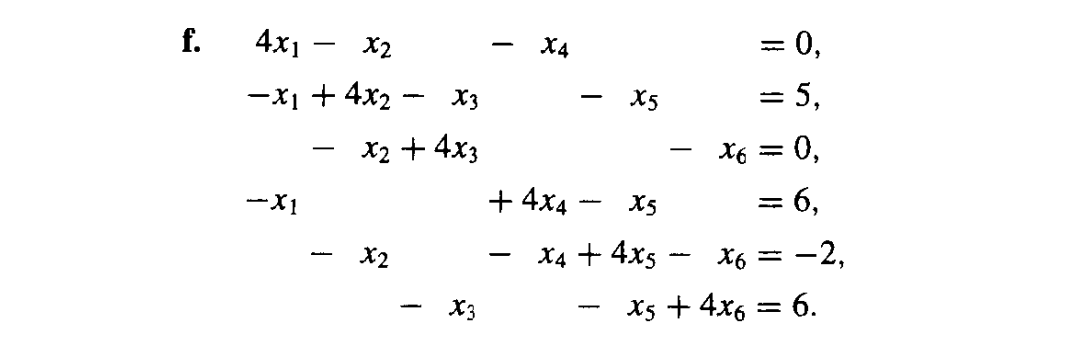

### 3.1 Jacobi Method

In [127]:
import numpy as np
def JacobiMethod(A,b,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_inv = np.linalg.inv(D)
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        temp = X
        X =  np.dot(np.dot(D_inv,L+U),X) + np.dot(D_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([[4,-1,0,-1,0,0],
              [-1,4,-1,0,-1,0],
              [0,-1,4,0,0,-1],
              [-1,0,0,4,-1,0],
              [0,-1,0,-1,4,-1],
              [0,0,-1,0,-1,4]
])
b = np.array([0,5,0,6,-2,6])
N = 30
JacobiMethod(A,b,N)

The 0 th iteration： [0. 0. 0. 0. 0. 0.]
The 1 th iteration: [ 0.    1.25  0.    1.5  -0.5   1.5 ]
The 2 th iteration: [0.6875 1.125  0.6875 1.375  0.5625 1.375 ]
The 3 th iteration: [0.625    1.734375 0.625    1.8125   0.46875  1.8125  ]
The 4 th iteration: [0.88671875 1.6796875  0.88671875 1.7734375  0.83984375 1.7734375 ]
The 5 th iteration: [0.86328125 1.90332031 0.86328125 1.93164062 0.80664062 1.93164062]
The 6 th iteration: [0.95874023 1.88330078 0.95874023 1.91748047 0.94165039 1.91748047]
The 7 th iteration: [0.95019531 1.96478271 0.95019531 1.97509766 0.92956543 1.97509766]
The 8 th iteration: [0.98497009 1.95748901 0.98497009 1.96994019 0.97874451 1.96994019]
The 9 th iteration: [0.9818573  1.98717117 0.9818573  1.99092865 0.97434235 1.99092865]
The 10 th iteration: [0.99452496 1.98451424 0.99452496 1.98904991 0.99225712 1.98904991]
The 11 th iteration: [0.99339104 1.99532676 0.99339104 1.99669552 0.99065351 1.99669552]
The 12 th iteration: [0.99800557 1.9943589  0.99800557 1

### 3.2 Gauss--Seidel Method

In [131]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([[4,-1,0,-1,0,0],
              [-1,4,-1,0,-1,0],
              [0,-1,4,0,0,-1],
              [-1,0,0,4,-1,0],
              [0,-1,0,-1,4,-1],
              [0,0,-1,0,-1,4]
])
b = np.array([0,5,0,6,-2,6])
w=1
N = 30
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0. 0.]
The 1 th iteration: [0.     1.25   0.3125 1.5    0.1875 1.625 ]
The 2 th iteration: [0.6875     1.546875   0.79296875 1.71875    0.72265625 1.87890625]
The 3 th iteration: [0.81640625 1.83300781 0.92797852 1.88476562 0.89916992 1.95678711]
The 4 th iteration: [0.92944336 1.93914795 0.97398376 1.95715332 0.96327209 1.98431396]
The 5 th iteration: [0.97407532 1.97783279 0.99053669 1.98433685 0.9866209  1.9942894 ]
The 6 th iteration: [0.99054241 1.991925   0.9965536  1.99429083 0.99512631 1.99791998]
The 7 th iteration: [0.99655396 1.99705847 0.99874461 1.99792007 0.99822463 1.99924231]
The 8 th iteration: [0.99874463 1.99892847 0.99954269 1.99924232 0.99935327 1.99972399]
The 9 th iteration: [0.9995427  1.99960967 0.99983341 1.99972399 0.99976441 1.99989946]
The procedure was successful.


### 3.3 SOR Method

In [132]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([[4,-1,0,-1,0,0],
              [-1,4,-1,0,-1,0],
              [0,-1,4,0,0,-1],
              [-1,0,0,4,-1,0],
              [0,-1,0,-1,4,-1],
              [0,0,-1,0,-1,4]
])
b = np.array([0,5,0,6,-2,6])
w=1.1
N = 30
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0. 0.]
The 1 th iteration: [0.       1.375    0.378125 1.65     0.281875 1.8315  ]
The 2 th iteration: [0.831875   1.64776562 0.91898555 1.79128125 0.87121289 1.95915457]
The 3 th iteration: [0.86255039 1.93972937 0.98029453 1.94765678 0.97067741 1.99060182]
The 4 th iteration: [0.98277615 1.98780779 0.99603319 1.99243405 0.99491427 1.99845037]
The 5 th iteration: [0.99628889 1.99770922 0.99934057 1.99833746 0.99899526 1.99969732]
The 6 th iteration: [0.99928395 1.99957452 0.9998657  1.99969304 0.99981581 1.99994268]
The 7 th iteration: [0.99987018 1.99991926 0.99997547 1.99994435 0.99996515 1.9999894 ]
The procedure was successful.


In [133]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-3):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

A = np.array([[4,-1,0,-1,0,0],
              [-1,4,-1,0,-1,0],
              [0,-1,4,0,0,-1],
              [-1,0,0,4,-1,0],
              [0,-1,0,-1,4,-1],
              [0,0,-1,0,-1,4]
])
b = np.array([0,5,0,6,-2,6])
N = 30
w=1.3
SORMethod(A,b,w,N)

The 0 th iteration： [0. 0. 0. 0. 0. 0.]
The 1 th iteration: [0.       1.625    0.528125 1.95     0.511875 2.288   ]
The 2 th iteration: [1.161875   1.85310938 1.18742305 1.90896875 1.16271289 2.02739418]
The 3 th iteration: [0.87411289 2.11694806 0.99068431 2.03927775 1.01086263 1.9922845 ]
The 4 th iteration: [1.08853952 1.99419368 0.99840012 2.02052237 0.99901639 2.00147501]
The 5 th iteration: [0.97822086 1.99382404 0.99895216 1.9864454  0.99436203 1.99738461]
The 6 th iteration: [1.00012131 1.99971932 0.99937313 2.00227347 1.00148904 2.00106482]
The 7 th iteration: [1.00061126 2.00056307 1.00071713 2.00000056 1.00008253 1.99994044]
The 8 th iteration: [0.9999998  2.0000909  0.99979505 2.00002659 0.99999407 1.99994933]
The procedure was successful.


### 3.4 Comparison

We gather all the results in the two tables below.


|  Method (7.3/5f)  | Jacobi Method  | Gauss-Seidel Method  | SOR Method with $w=1.1$  | SOR Method with $w=1.3$  |
|  ----  | ----  | ----  | ----  | ----  |
| $x_1$  | 0.99973534 | 0.9995427 | 0.99987018 | 0.9999998 |
| $x_2$  | 1.99925144 | 1.99960967 | 1.99991926 | 2.0000909 | 
| $x_3$  | 0.99973534 | 0.99983341 | 0.99997547 | 0.99979505 |
| $x_4$  | 1.99947069 | 1.99972399 | 1.99994435 | 2.00002659 |
| $x_5$  | 0.99962572 | 0.99976441 | 0.99996515 | 0.99999407 |
| $x_6$  | 1.99947069 | 1.99989946 | 1.9999894 | 1.99994933 |

and the comparison of iteration times.

|  Method (7.3/5e)  | Jacobi Method  | Gauss-Seidel Method  | SOR Method with $w=1.1$  | SOR Method with $w=1.3$  |
|  ----  | ----  | ----  | ----  | ----  |
| Iteration Times  | 16 | 9 | 7 | 8 |

Similarly we can see that 
1. The Jacobi method has more iteration steps than Gauss Seidel 
2. The Jacobi method has more iteration steps than SOR Method. 
3. Still we can't see clearly how $w$ infect the effect of SOR method. Actually how $w$ infect the effect of SOR method depends on the specific problem to be solved.

## 4 Appendix of Codes

### 4.1 Jacobi Method

In [120]:
import numpy as np
def JacobiMethod(A,b,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_inv = np.linalg.inv(D)
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        temp = X
        X =  np.dot(np.dot(D_inv,L+U),X) + np.dot(D_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-5):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

### 4.2 Gauss-Seidel Method

In [121]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-5):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  

w = 1

### 4.3 SOR Method

In [122]:
import numpy as np
def SORMethod(A,b,w,N):
    n = A.shape[1] # column numbers
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = A[np.arange(n),np.arange(n)]
    LU = D - A
    L = np.tril(LU)
    U = np.triu(LU)
    D_wL = D - w*L
    X = np.zeros(n)
    print("The",0,"th iteration：",X)
    for i in range(N):
        D_wL_inv = np.linalg.inv(D_wL)
        temp = X
        X =  np.dot(np.dot(D_wL_inv,w * U + (1-w) * D),X) + w * np.dot(D_wL_inv,b)
        if np.linalg.norm(X-temp,ord=np.inf,axis=None) < 10**(-5):
            print("The",i+1,"th iteration:",X)
            print('The procedure was successful.')
            return
        print("The",i+1,"th iteration:",X)  